# Classification

The Palmer Penguins dataset is a common resource for data exploration and demonstration of data analysis techniques. It was brought into the limelight by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, which is a member of the Long Term Ecological Research Network.

The dataset includes data for 344 penguins from three different species found on three islands in the Palmer Archipelago, Antarctica. The measured attributes in the dataset include:

1. **Species**: The species of the penguin, which can be Adelie, Gentoo, or Chinstrap.
2. **Island**: The island in the Palmer Archipelago, Antarctica, where the penguin observation was made. The options are Torgersen, Biscoe, or Dream.
3. **Culmen Length (mm)**: The length of the penguin's culmen (bill).
4. **Culmen Depth (mm)**: The depth of the penguin's culmen (bill).
5. **Flipper Length (mm)**: The length of the penguin's flipper.
6. **Body Mass (g)**: The body mass of the penguin.
7. **Sex**: The sex of the penguin.

The Palmer Penguins dataset is excellent for practicing data cleaning, exploration, and visualization. 

You can find more information about the dataset, including a more detailed explanation of the variables, in this repository: [allisonhorst/palmerpenguins](https://github.com/allisonhorst/palmerpenguins).

For more in-depth studies or referencing, you might also consider checking out the publications from Palmer Station LTER: [pal.lternet.edu/bibliography](http://pal.lternet.edu/bibliography).


In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay

In [164]:
# read penquins dataset from github
penguins = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [165]:
# drop the year column, it is not useful for our analysis, 
# and it has no adequate explanation in the dataset documentation

penguins = penguins.drop('year', axis=1)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

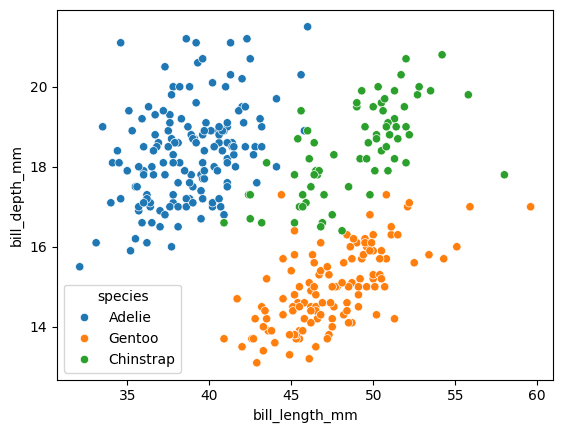

In [166]:
# Create a scatterplot of bill length vs bill depth using seaborn, hue by species. 
# Add a title.

sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

In [167]:
numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',	'body_mass_g']
categorical_features = ['island', 'sex']

In [168]:
from sklearn.pipeline import make_pipeline
# create a pipeline to impute missing values with the mean and scale numeric features
num_pipeline = make_pipeline(
    SimpleImputer(strategy="mean"), 
    StandardScaler())

# create a pipeline to impute missing values with the most frequent value and one-hot encode categorical features
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

# create a column transformer to apply the numeric and categorical pipelines to the correct features
# use remainder='passthrough' to keep the remaining features in the dataframe
preprocessor = ColumnTransformer([
    ("num", num_pipeline, numeric_features),
    ("cat", cat_pipeline, categorical_features),
    ], remainder='passthrough')

# fit_transform the preprocessor on the penguins dataset
penguins_prepared = preprocessor.fit_transform(penguins)
#convert the result to a dataframe
df_penguins_prepared = pd.DataFrame(penguins_prepared,
                                   columns=preprocessor.get_feature_names_out())
# use the preprocessor's get_feature_names_out() method to get the column names
print(preprocessor.get_feature_names_out())

# display the first 5 rows of the preprocessed dataframe
df_penguins_prepared.head()

['num__bill_length_mm' 'num__bill_depth_mm' 'num__flipper_length_mm'
 'num__body_mass_g' 'cat__island_Biscoe' 'cat__island_Dream'
 'cat__island_Torgersen' 'cat__sex_female' 'cat__sex_male'
 'remainder__species']


,num__bill_length_mm,num__bill_depth_mm,num__flipper_length_mm,num__body_mass_g,cat__island_Biscoe,cat__island_Dream,cat__island_Torgersen,cat__sex_female,cat__sex_male,remainder__species
0,-0.887081,0.787743,-1.422488,-0.565789,0.0,0.0,1.0,0.0,1.0,Adelie
1,-0.813494,0.126556,-1.065352,-0.503168,0.0,0.0,1.0,1.0,0.0,Adelie
2,-0.66632,0.431719,-0.422507,-1.192003,0.0,0.0,1.0,1.0,0.0,Adelie
3,-0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,Adelie
4,-1.328605,1.092905,-0.565361,-0.941517,0.0,0.0,1.0,1.0,0.0,Adelie


In [169]:
# separate the features from the target
# call the features X and the target y
X = df_penguins_prepared
y = penguins['species']


In [170]:
# setup binary classification for Adelie vs. rest of species
# use the Adelie species as the positive class
# create a new target called y_adelie
y_adelie = (y == 'Adelie')



In [171]:
# build an SGDClassifier model using X and y
# use random_state=42 for reproducibility
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X, y_adelie)





ValueError: could not convert string to float: 'Adelie'

In [ ]:
# compute the accuracy using cross_val_score with cv=10

accuracy = cross_val_score(sgd_clf, X, y_adelie, cv=10, scoring="accuracy")

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/indexes/base.py", line 3791, in get_loc
    return self._engine.get_loc(casted_key)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "index.pyx", line 152, in pandas._libs.index.IndexEngine.get_loc
  File "index.pyx", line 181, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 7080, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 7088, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'bill_length_mm'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/__init__.py", line 480, in _get_column_indices
    col_idx = all_columns.get_loc(col)
              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/pandas/core/indexes/base.py", line 3798, in get_loc
    raise KeyError(key) from err
KeyError: 'bill_length_mm'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/pipeline.py", line 471, in fit
    Xt = self._fit(X, y, routed_params)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/pipeline.py", line 408, in _fit
    X, fitted_transformer = fit_transform_one_cached(
                            ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/joblib/memory.py", line 353, in __call__
    return self.func(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/pipeline.py", line 1303, in _fit_transform_one
    res = transformer.fit_transform(X, y, **params.get("fit_transform", {}))
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_set_output.py", line 273, in wrapped
    data_to_wrap = f(self, X, *args, **kwargs)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py", line 906, in fit_transform
    self._validate_column_callables(X)
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py", line 496, in _validate_column_callables
    transformer_to_input_indices[name] = _get_column_indices(X, columns)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/__init__.py", line 488, in _get_column_indices
    raise ValueError("A given column is not a column of the dataframe") from e
ValueError: A given column is not a column of the dataframe


In [ ]:
# compute the mean accuracy
accuracy.mean()


NameError: name 'accuracy' is not defined

In [ ]:
# predict the target using cross_val_predict with cv=10
# call the result y_train_pred
y_train_pred = cross_val_predict(sgd_clf, X, y_adelie, cv=10)


ValueError: could not convert string to float: 'Adelie'

In [ ]:
# compute the confusion matrix
conf_matrix = confusion_matrix(y_adelie, y_train_pred)


In [ ]:
# compute the precision score using precision_score()
precision = precision_score(y_adelie, y_train_pred)


In [ ]:
# compute the recall score using recall_score()
recall = recall_score(y_adelie, y_train_pred)


In [ ]:
# draw the precision-recall curve
# call the result precisions, recalls, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_adelie, y_train_pred)

NameError: name 'y_adelie' is not defined

In [ ]:
# call the result fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_adelie, y_train_pred)
# plot the roc curve
plt.plot(fpr, tpr, linewidth=2)

NameError: name 'y_adelie' is not defined

In [ ]:
# now let's do multiclass classification
# build an SGDClassifier model using X and y
# use random_state=42 for reproducibility

In [ ]:
# show the mean accuracy using cross_val_score with cv=10

In [ ]:
# predict the target using cross_val_predict with cv=10
# call the result y_train_pred
# show the confusion matrix

In [ ]:
# use ConfusionMatrixDisplay to display the confusion matrix
